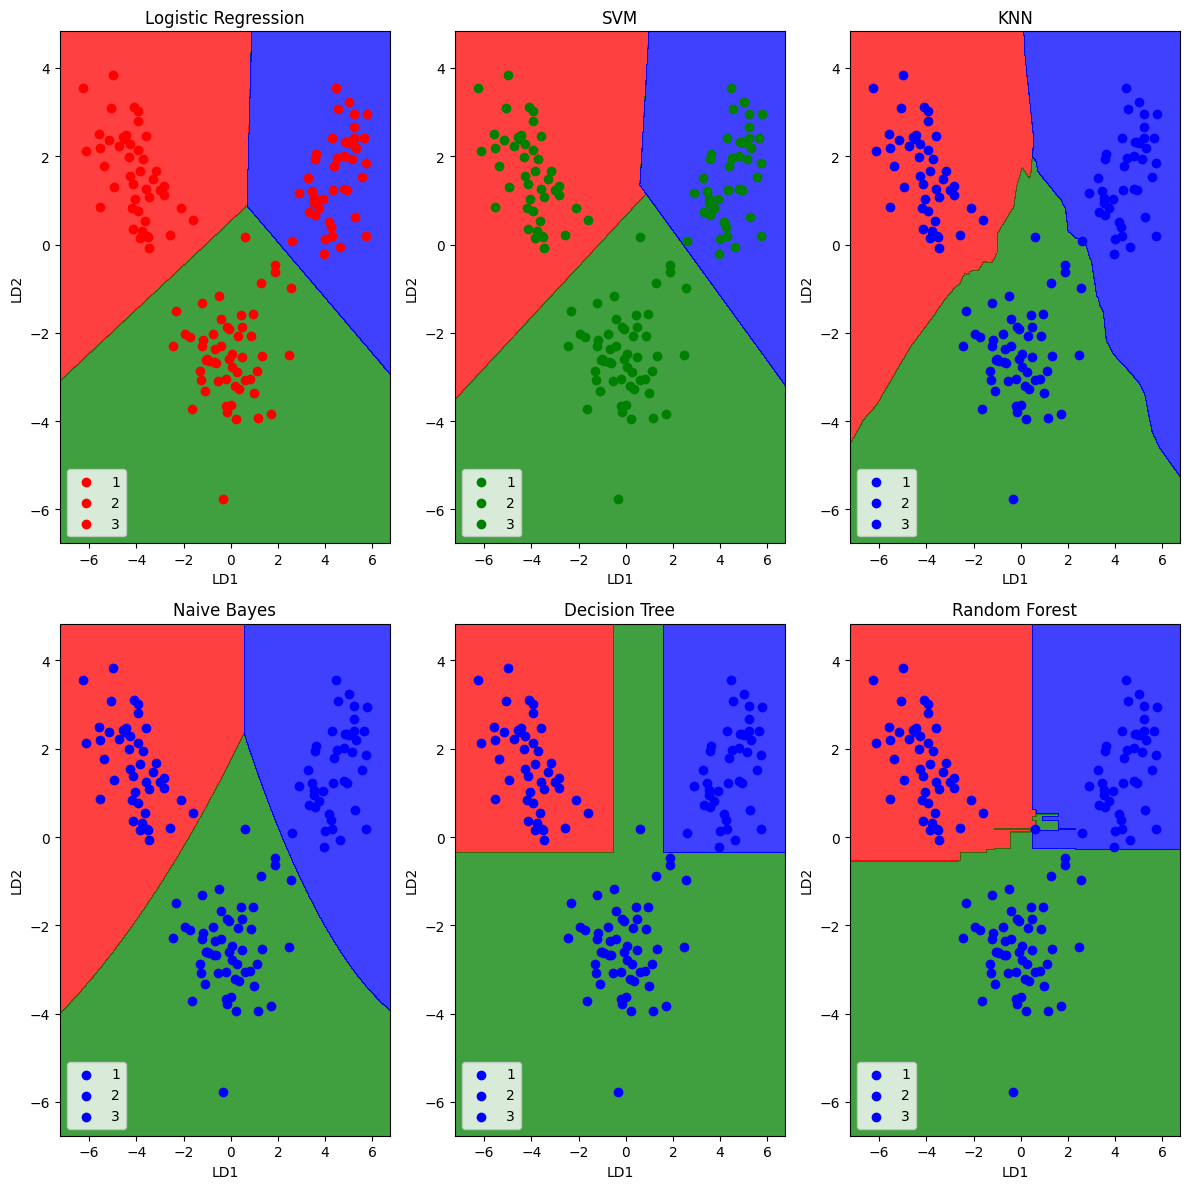

Confusion Matrix for Logistic Regression:
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Accuracy for Logistic Regression: 1.0000

Confusion Matrix for SVM:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Accuracy for SVM: 0.9722

Confusion Matrix for KNN:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Accuracy for KNN: 0.9722

Confusion Matrix for Naive Bayes:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Accuracy for Naive Bayes: 0.9722

Confusion Matrix for Decision Tree:
[[13  1  0]
 [ 0 16  0]
 [ 0  0  6]]
Accuracy for Decision Tree: 0.9722

Confusion Matrix for Random Forest:
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Accuracy for Random Forest: 1.0000



In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Load dataset (you can replace this with your own dataset)
dataset = pd.read_csv('Wine.csv')  # Example dataset, replace with your actual dataset
X = dataset.iloc[:, 0:13].values  # Assuming the features are in columns 0 to 12
y = dataset.iloc[:, 13].values  # Assuming the target variable is in column 13

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply Linear Discriminant Analysis (LDA) for dimensionality reduction to 2 components
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train models: Logistic Regression, SVM, KNN, Naive Bayes, Decision Tree, and Random Forest

# Logistic Regression
classifier_log = LogisticRegression(random_state=0)
classifier_log.fit(X_train_lda, y_train)

# SVM (Support Vector Machine)
classifier_svc = SVC(kernel='linear', random_state=0)
classifier_svc.fit(X_train_lda, y_train)

# KNN (K-Nearest Neighbors)
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(X_train_lda, y_train)

# Naive Bayes
classifier_nb = GaussianNB()
classifier_nb.fit(X_train_lda, y_train)

# Decision Tree
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_dt.fit(X_train_lda, y_train)

# Random Forest
classifier_rf = RandomForestClassifier(n_estimators=10, random_state=0)
classifier_rf.fit(X_train_lda, y_train)

# Create a function to visualize decision boundaries for all classifiers
def visualize_decision_boundaries(X_train_lda, y_train, classifiers, titles):
    from matplotlib.colors import ListedColormap
    plt.figure(figsize=(12, 12))
    
    X_set, y_set = X_train_lda, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    for i, (classifier, title) in enumerate(zip(classifiers, titles)):
        plt.subplot(2, 3, i + 1)
        plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
        plt.xlim(X1.min(), X1.max())
        plt.ylim(X2.min(), X2.max())

        for j, c in enumerate(np.unique(y_set)):
            plt.scatter(X_set[y_set == c, 0], X_set[y_set == c, 1], 
                        color=ListedColormap(('red', 'green', 'blue'))(i), label=c)
        
        plt.title(title)
        plt.xlabel('LD1')
        plt.ylabel('LD2')
        plt.legend()

    plt.tight_layout()
    plt.show()

# List of classifiers
classifiers = [
    classifier_log,  # Logistic Regression
    classifier_svc,  # SVM
    classifier_knn,  # KNN
    classifier_nb,   # Naive Bayes
    classifier_dt,   # Decision Tree
    classifier_rf    # Random Forest
]

# Titles for the subplots
titles = [
    'Logistic Regression', 
    'SVM', 
    'KNN', 
    'Naive Bayes', 
    'Decision Tree', 
    'Random Forest'
]

# Visualizing decision boundaries for all classifiers
visualize_decision_boundaries(X_train_lda, y_train, classifiers, titles)

# Making predictions and confusion matrices for all classifiers
for model, name in zip(classifiers, titles):
    y_pred = model.predict(X_test_lda)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)
    print(f"Accuracy for {name}: {np.trace(cm) / np.sum(cm):.4f}\n")
